In [11]:
import librosa as lr
import librosa.display

import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

In [4]:
# downloaded audio and frequency from mp3-file

audio, sfreq = lr.load('07. Wind In The Willows.mp3') 
time = np.arange(0, len(audio)) / sfreq  # time (seconds)

In [13]:
sfreq

22050

## 1. defining the intro

In [6]:
# created intro (first n seconds)
duration = 21

intro_audio = audio[:22050*duration]
intro_time = time[:22050*duration]

In [56]:
# to listen

ipd.Audio(intro_audio, rate=sfreq)

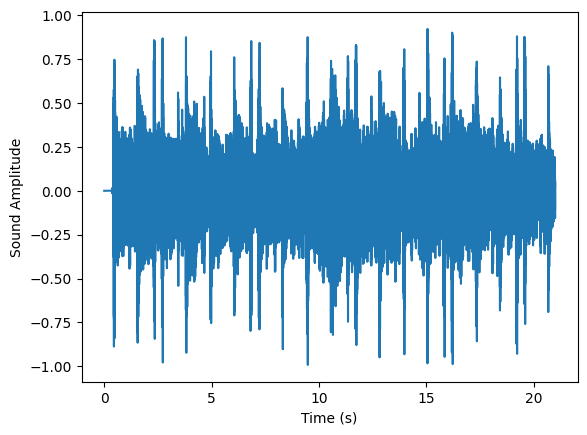

In [9]:
# plot

fig, ax = plt.subplots()
ax.plot(intro_time, intro_audio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
plt.show()

## 2. detecting 1 level of beats

In [15]:
# detected main beats in the intro

tempo_lev1, beat_times_lev1 = librosa.beat.beat_track(y=intro_audio, sr=sfreq, start_bpm=60, units='time')
print(tempo_lev1)
print(beat_times_lev1)

53.8330078125
[ 0.44117914  1.57895692  2.71673469  3.83129252  4.94585034  6.08362812
  7.19818594  8.33596372  9.4737415  10.58829932 11.70285714 12.84063492
 13.95519274 15.06975057 16.20752834 17.34530612 18.45986395 19.59764172]


(-1.0, 1.0)

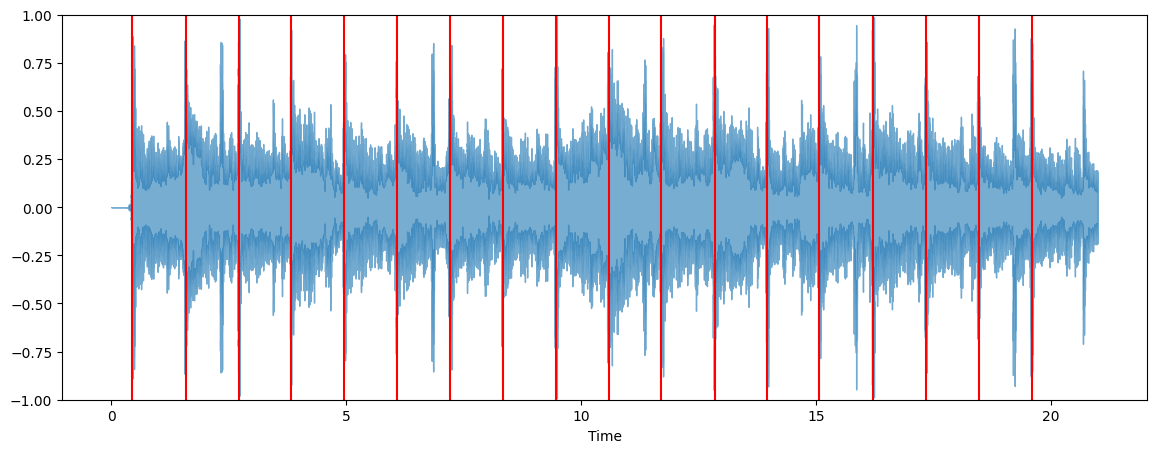

In [16]:
# plot

plt.figure(figsize=(14, 5))
librosa.display.waveshow(intro_audio, alpha=0.6)
plt.vlines(beat_times_lev1, -1, 1, color='r')
plt.ylim(-1, 1)

# waveplot -> waveshow

In [19]:
# time gaps between main beats

beat_times_lev1_diff = np.diff(beat_times_lev1)
beat_times_lev1_diff

array([1.13777778, 1.13777778, 1.11455782, 1.11455782, 1.13777778,
       1.11455782, 1.13777778, 1.13777778, 1.11455782, 1.11455782,
       1.13777778, 1.11455782, 1.11455782, 1.13777778, 1.13777778,
       1.11455782, 1.13777778])

In [47]:
mean_beat_len = np.round(np.mean(beat_times_lev1_diff),3)
mean_beat_len

1.127

In [21]:
# added clicks for main beats

clicks_lev1 = librosa.clicks(times=beat_times_lev1, sr=sfreq, length=len(intro_audio))
ipd.Audio(intro_audio + clicks_lev1, rate=sfreq)

## 3. defining 2 level of beats

In [22]:
# to detect beats between 1 level of beats

def second_level_beats(gap, sfreq):
    tempo_lev2, beat_times_lev2 = librosa.beat.beat_track(y=gap, sr=sfreq, start_bpm=60, units='time')
    return beat_times_lev2

In [30]:
second_level_beats_list = []

for i in range(1, len(beat_times_lev1)):
    second_level_beats_list.append(second_level_beats(intro_audio[
        int(22050*(beat_times_lev1[i-1] + 0.08)):
        int(22050*(beat_times_lev1[i] - 0.04))
    ], sfreq))
    print(int(22050*(beat_times_lev1[i-1] + 0.08)) - int(22050*(beat_times_lev1[i-1] + 0.08)))
    
second_level_beats_list

[array([0.32507937, 0.69659864]),
 array([0.32507937]),
 array([0.30185941]),
 array([0.32507937]),
 array([0.32507937]),
 array([0.30185941]),
 array([0.32507937]),
 array([0.30185941]),
 array([0.30185941, 0.67337868]),
 array([0.30185941]),
 array([0.32507937]),
 array([0.30185941]),
 array([0.30185941]),
 array([0.32507937, 0.67337868]),
 array([0.30185941]),
 array([0.30185941]),
 array([0.32507937])]

In [41]:
# list(beat_times_lev1)

In [45]:
full_list_of_beats = []
matrix_of_beats = []

for i in range(1, len(beat_times_lev1)):
    full_list_of_beats.append(beat_times_lev1[i-1])
    matrix_of_beats.append([beat_times_lev1[i-1]])
#     print(matrix_of_beats)
    for j in range(len(second_level_beats_list[i-1])):
        full_list_of_beats.append(beat_times_lev1[i-1] + second_level_beats_list[i-1][j] + 0.08)
        matrix_of_beats[i-1].append(beat_times_lev1[i-1] + second_level_beats_list[i-1][j] + 0.08)
    
# full_list_of_beats
# matrix_of_beats

In [39]:
full_array_of_beats = np.array(full_list_of_beats)

# added clicks for all beats

clicks_lev12 = librosa.clicks(times=full_array_of_beats, sr=sfreq, length=len(intro_audio))
ipd.Audio(intro_audio + clicks_lev12, rate=sfreq)

(-1.0, 1.0)

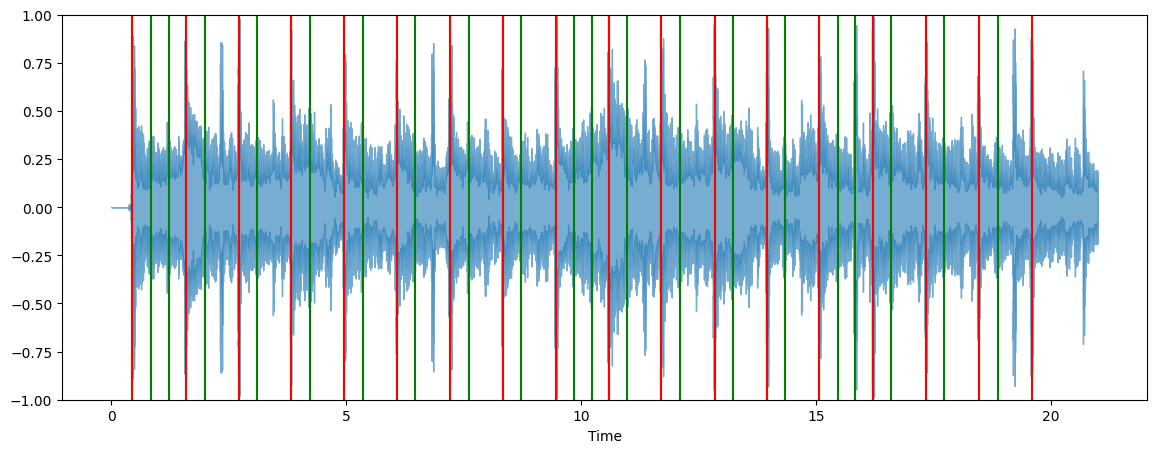

In [61]:
# main beat and 2 support beats (if there are)
# plot

plt.figure(figsize=(14, 5))
librosa.display.waveshow(intro_audio, alpha=0.6)
plt.vlines(full_array_of_beats, -1, 1, color='g')
plt.vlines(beat_times_lev1, -1, 1, color='r')
plt.ylim(-1, 1)


## 4. (if there are not all beats) checking 3/4 

In [40]:
# time gaps between all beats

beat_times_lev12_diff = np.diff(full_array_of_beats)
beat_times_lev12_diff

array([0.40507937, 0.37151927, 0.36117914, 0.40507937, 0.73269841,
       0.38185941, 0.73269841, 0.40507937, 0.70947846, 0.40507937,
       0.73269841, 0.38185941, 0.73269841, 0.40507937, 0.73269841,
       0.38185941, 0.75591837, 0.38185941, 0.37151927, 0.36117914,
       0.38185941, 0.73269841, 0.40507937, 0.73269841, 0.38185941,
       0.73269841, 0.38185941, 0.73269841, 0.40507937, 0.34829932,
       0.38439909, 0.38185941, 0.75591837, 0.38185941, 0.73269841,
       0.40507937])

In [49]:
less_than_half = beat_times_lev12_diff[beat_times_lev12_diff < mean_beat_len/2]
less_than_half

array([0.40507937, 0.37151927, 0.36117914, 0.40507937, 0.38185941,
       0.40507937, 0.40507937, 0.38185941, 0.40507937, 0.38185941,
       0.38185941, 0.37151927, 0.36117914, 0.38185941, 0.40507937,
       0.38185941, 0.38185941, 0.40507937, 0.34829932, 0.38439909,
       0.38185941, 0.38185941, 0.40507937])

In [50]:
more_than_half = beat_times_lev12_diff[beat_times_lev12_diff > mean_beat_len/2]
more_than_half

array([0.73269841, 0.73269841, 0.70947846, 0.73269841, 0.73269841,
       0.73269841, 0.75591837, 0.73269841, 0.73269841, 0.73269841,
       0.73269841, 0.75591837, 0.73269841])

In [51]:
once_beat_len = np.round(np.mean(less_than_half),3)
once_beat_len

0.386

In [52]:
twice_beat_len = np.round(np.mean(more_than_half),3)
twice_beat_len

0.734

In [53]:
twice_beat_len / once_beat_len

1.9015544041450776

In [54]:
mean_beat_len / once_beat_len

2.919689119170984

## 5. adding all 3 beates

In [55]:
# main beat and 2 support beats

beat1_clicks = librosa.clicks(times=beat_times_lev1, sr=sfreq, length=len(intro_audio), click_duration=0.8)
beat2_clicks = librosa.clicks(times=beat_times_lev1 + mean_beat_len/3, sr=sfreq, length=len(intro_audio), click_duration=0.2)
beat3_clicks = librosa.clicks(times=beat_times_lev1 + 2*mean_beat_len/3, sr=sfreq, length=len(intro_audio), click_duration=0.2)

ipd.Audio(intro_audio + beat1_clicks + beat2_clicks + beat3_clicks, rate=sfreq)


(-1.0, 1.0)

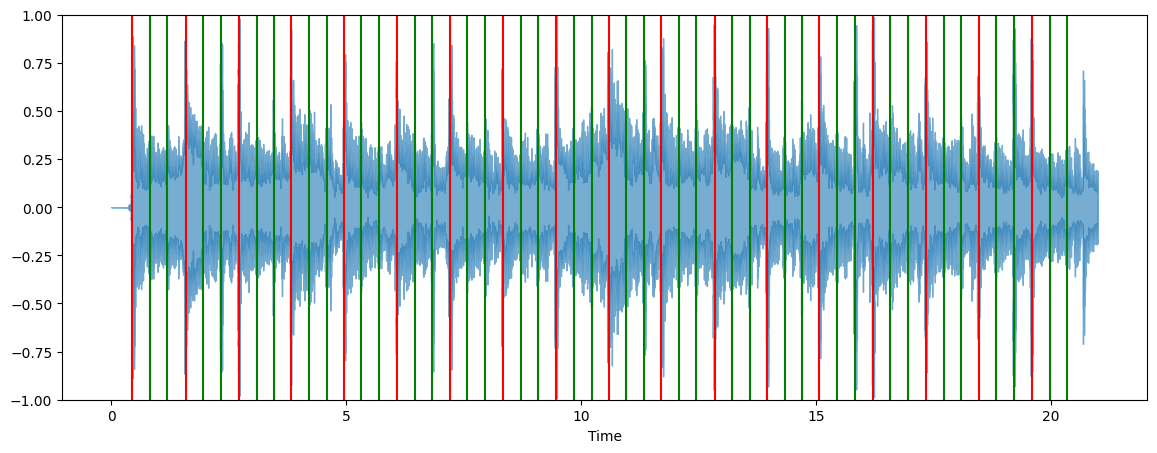

In [57]:
# plot

plt.figure(figsize=(14, 5))
librosa.display.waveshow(intro_audio, alpha=0.6)
plt.vlines(beat_times_lev1, -1, 1, color='r')
plt.vlines(beat_times_lev1 + mean_beat_len/3, -1, 1, color='g')
plt.vlines(beat_times_lev1 + 2*mean_beat_len/3, -1, 1, color='g')
plt.ylim(-1, 1)